Implementation an adaptation of blog post:  Srikar.  ["Python Implementation of Andrew Ng's Machine Learning Course (Part 2.1)."](https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-2-1-1a666f049ad6) Analytics Vidhya.  3 September, 2018.  

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from pathlib import Path

In [5]:
PATH = Path.home() / "Code/cipher813/coursera_ng_machine_learning/machine-learning-ex2/ex2/"
data1 = pd.read_csv(PATH / "ex2data1.txt", header=None)
data2 = pd.read_csv(PATH / "ex2data2.txt", header=None)

In [6]:
os.listdir(PATH)

['plotDecisionBoundary.m',
 'plotData.m',
 'sigmoid.m',
 'costFunctionReg.m',
 'ex2.m',
 'ex2data2.txt',
 'ex2data1.txt',
 'mapFeature.m',
 'predict.m',
 'lib',
 'submit.m',
 'ex2_reg.m',
 'costFunction.m']

### Logistic Regression

Test Scores

In [7]:
data1

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [9]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,2]

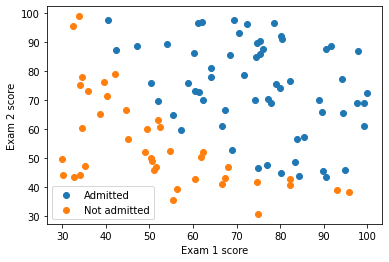

In [10]:
# visualize
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted','Not admitted'))
plt.show()

Hypothesis

$h_{\theta}(x) = \frac{1}{1 + e^{-\theta^{T}x}}$

Sigmoid

$g(z) = \frac{1}{1+e^{-z}}$

Cost Function (Regularized)

$J(\theta) = -[\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log h_{\theta}(x^{(i)})+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$

Gradient Descent (Regularized)

$\theta_{j} := \theta_{j} - \alpha[\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)} + \frac{\lambda}{m}\theta_{j}]$

In [14]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def cost_function(theta, X, y):
    J = (-1/m)* np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1-sigmoid(X @ theta))))
    return J

def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [15]:
(m, n) = X.shape
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]
theta = np.zeros((n+1,1))  # initialize theta with all zeros

J = cost_function(theta, X, y)
J

0.6931471805599453

In [16]:
temp = opt.fmin_tnc(func = cost_function, x0 = theta.flatten(), fprime = gradient, args = (X, y.flatten()))

# output of above function is a tuple whose first element
# contains the optimized values of theta
theta_optimized = temp[0]
theta_optimized

array([-25.16131855,   0.20623159,   0.20147149])

In [17]:
J = cost_function(theta_optimized[:,np.newaxis], X, y)
J

0.20349770158947486

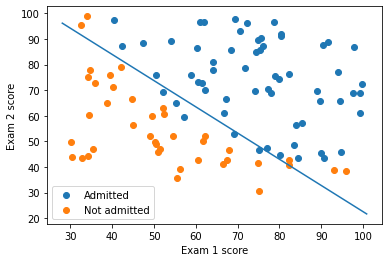

In [18]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] + np.dot(theta_optimized[1],plot_x))

mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted','Not admitted'))
plt.show()

In [20]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta))>=cutoff]
    acc = np.mean(pred==y)
    print(f"{acc * 100}%")
    
accuracy(X, y.flatten(), theta_optimized, 0.5)

89.0%


### Regularized Logistic Regression

Fabrication Plant

In [21]:
X = data2.iloc[:,:-1]
y = data2.iloc[:,2]
data2.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


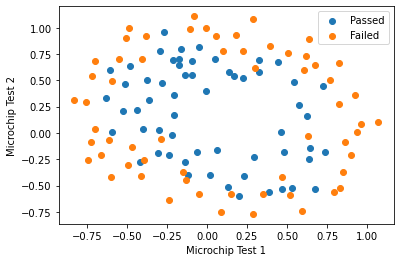

In [23]:
# visualize
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend((passed, failed), ('Passed','Failed'))
plt.show()

In [24]:
def map_feature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
    return out

X = map_feature(X.iloc[:,0], X.iloc[:,1])

In [25]:
X

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [27]:
def reg_cost_function(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
#     J = (-1/m)* np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1-sigmoid(X @ theta))))
    J = (-1/m)*(y_t.T @ np.log(sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - sigmoid(X_t @ theta_t)))
    reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    J = J + reg
    return J

def reg_gradient_descent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [28]:
(m, n) = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n,1))
lmbda = 1

J = reg_cost_function(theta, X, y, lmbda)
J

array([[0.69314718]])

In [29]:
output = opt.fmin_tnc(func = reg_cost_function, x0=theta.flatten(), fprime = reg_gradient_descent, args = (X, y.flatten(), lmbda))
theta = output[0]
theta

array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
       -1.45817009, -0.05098418, -0.61558556, -0.27469165, -1.19271299,
       -0.24217841, -0.20603301, -0.04466178, -0.27778949, -0.29539514,
       -0.45645982, -1.04319154,  0.02779373, -0.29244867,  0.0155576 ,
       -0.32742404, -0.1438915 , -0.92467488])

In [30]:
pred = [sigmoid(np.dot(X, theta))>=0.5]
np.mean(pred == y.flatten()) * 100

83.05084745762711

In [31]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

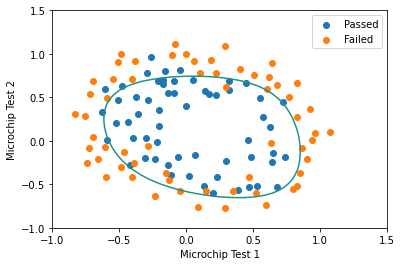

In [33]:
def map_feature_for_plotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(map_feature_for_plotting(u[i], v[j]), theta)
        
mask = y.flatten() == 1
X = data2.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()